<a href="https://colab.research.google.com/github/sudhanshu-wani/MLDLS_2022/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# Import the neccessary modules
import pandas as pd
import numpy as np
import seaborn as sb

In [48]:
# Read the dataset into a dataframe
df = pd.read_csv('titanic.csv', sep='\t', engine='python')

In [49]:
#We drop the colmns which will not be usefull for our analysis
cols_to_drop = ['Name', 'Ticket', 'Cabin']
df = df.drop(cols_to_drop, axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Sex          156 non-null    object 
 4   Age          126 non-null    float64
 5   SibSp        156 non-null    int64  
 6   Parch        156 non-null    int64  
 7   Fare         156 non-null    float64
 8   Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 11.1+ KB


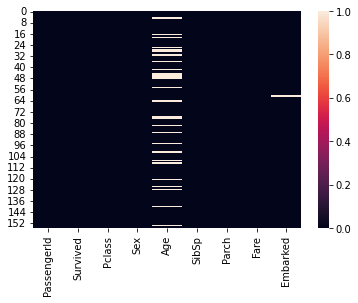

In [50]:
#A heatmap which shows Null values in important columns
df.info()
sb.heatmap(df.isnull())

In [51]:
#interpolate basically gives the average of the vaules which are above and below the empty cell
df['Age'] = df['Age'].interpolate()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Sex          156 non-null    object 
 4   Age          156 non-null    float64
 5   SibSp        156 non-null    int64  
 6   Parch        156 non-null    int64  
 7   Fare         156 non-null    float64
 8   Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 11.1+ KB


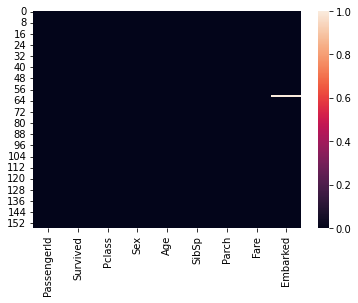

In [52]:
df.info()
sb.heatmap(df.isnull())

In [53]:
#We simply drop the single empty values as it will not much affect our code
df = df.dropna()

In [54]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.00,1,0,7.2500,S
1,2,1,1,female,38.00,1,0,71.2833,C
2,3,1,3,female,26.00,0,0,7.9250,S
3,4,1,1,female,35.00,1,0,53.1000,S
4,5,0,3,male,35.00,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
151,152,1,1,female,22.00,1,0,66.6000,S
152,153,0,3,male,55.50,0,0,8.0500,S
153,154,0,3,male,40.50,0,2,14.5000,S
154,155,0,3,male,45.75,0,0,7.3125,S


In [55]:
# First, create dummy columns from the Embarked and Sex columns
EmbarkedColumnDummy = pd.get_dummies(df['Embarked'])
SexColumnDummy = pd.get_dummies(df['Sex'])

In [56]:
df = pd.concat((df, EmbarkedColumnDummy, SexColumnDummy), axis=1)

In [57]:
# Drop the redundant columns thus converted
df = df.drop(['Sex','Embarked'],axis=1)

In [58]:
# Seperate the dataframe into X and y data
X = df.values
y = df['Survived'].values
# Delete the Survived column from X
X = np.delete(X,1,axis=1)

In [59]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,1,0,3,22.00,1,0,7.2500,0,0,1,0,1
1,2,1,1,38.00,1,0,71.2833,1,0,0,1,0
2,3,1,3,26.00,0,0,7.9250,0,0,1,1,0
3,4,1,1,35.00,1,0,53.1000,0,0,1,1,0
4,5,0,3,35.00,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,22.00,1,0,66.6000,0,0,1,1,0
152,153,0,3,55.50,0,0,8.0500,0,0,1,0,1
153,154,0,3,40.50,0,2,14.5000,0,0,1,0,1
154,155,0,3,45.75,0,0,7.3125,0,0,1,0,1


In [60]:
# Split the dataset into 70% Training and 30% Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)


**All the below blocks show us the implementation of Classification algorithm in which the percentage of accuracy compared with what the actual values is shown!**

.fit() is for Training the model

.score() is for testing the model

In [61]:
# Simple Decision Tree
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.7446808510638298

In [62]:
#Confusion Matrix
y_pred = dt_clf.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[30,  5],
       [ 7,  5]])

In [63]:
#Random Forest
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.7872340425531915

In [64]:
#Gradient Boosting
gb_clf = ensemble.GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_clf.score(X_test, y_test)

0.723404255319149

In [65]:
# Let's  tune this Gradient booster with specifying hyper parameter 
gb_clf = ensemble.GradientBoostingClassifier(n_estimators=50)
gb_clf.fit(X_train,y_train)
gb_clf.score(X_test, y_test)

0.7446808510638298

In [66]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train,y_train)
nb_clf.score(X_test,y_test)

0.7659574468085106

In [67]:
#K-Nearest Neighbor 
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train,y_train)
knn_clf.score(X_test,y_test)

0.574468085106383

In [68]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8085106382978723

In [71]:
#SVM
from sklearn.svm import SVC
sv_clf = SVC(probability = True, kernel = 'linear')
sv_clf.fit(X_train,y_train)
sv_clf.score(X_test,y_test)

0.7872340425531915